In [17]:
import tensorflow as tf
tf.set_random_seed(7)
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras import optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
from mlxtend.data import loadlocal_mnist
from sklearn.model_selection import train_test_split
import numpy as np

files = {
    "X": "data/train-images-idx3-ubyte",
    "y": "data/train-labels-idx1-ubyte",
    "X_test": "data/t10k-images-idx3-ubyte",
    "y_test": "data/t10k-labels-idx1-ubyte"
}

# Code to load the binary files.
# https://github.com/rasbt/mlxtend/blob/master/mlxtend/data/local_mnist.py

X, y = loadlocal_mnist(images_path = files['X'], labels_path = files['y'])
X_test, y_test = loadlocal_mnist(images_path = files['X_test'], labels_path = files['y_test'])

In [4]:
X = X.reshape(X.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(45000, 28, 28, 1)
(15000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
encoded_y_train = to_categorical(y_train)
encoded_y_valid = to_categorical(y_valid)
encoded_y_test = to_categorical(y_test)

In [11]:
# create model
model = Sequential()
# add model layers
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape =(28, 28, 1)))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax', kernel_initializer='random_uniform',bias_initializer='zeros'))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(X_train, encoded_y_train, validation_data = (X_valid,encoded_y_valid),batch_size=128, epochs = 3)

Train on 45000 samples, validate on 15000 samples
Epoch 1/3
 2688/45000 [>.............................] - ETA: 1:34 - loss: 2.7158 - acc: 0.5781

KeyboardInterrupt: 

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred[:10]
op = np.unravel_index(np.argmax(y_pred, axis=1), y_pred.shape)

In [0]:
accuracy_score(y_test, op[1])

0.9862

In [13]:
validation_acc = []
training_acc = []
validation_loss = []
training_loss = []

for activation_function in ['tanh', 'sigmoid', 'relu']:
    print('Activation function: {}'.format(activation_function))
    # create model
    model = Sequential()
    # add model layers
    model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape =(28, 28, 1)))
    model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(128, activation=activation_function))
    #one more dropout for convergence' sake :) 
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='random_uniform',bias_initializer='zeros'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    hist = model.fit(X_train, encoded_y_train, validation_data = (X_valid,encoded_y_valid),batch_size=128, epochs = 3)
    validation_acc.append(hist.history['val_acc'])
    training_acc.append(hist.history['acc'])
    validation_loss.append(hist.history['val_loss'])
    training_loss.append(hist.history['loss'])    

Activation function: tanh
Train on 45000 samples, validate on 15000 samples
Epoch 1/3
45000/45000 [==============================] - 97s 2ms/step - loss: 0.7752 - acc: 0.7889 - val_loss: 0.2464 - val_acc: 0.9381
Epoch 2/3
45000/45000 [==============================] - 97s 2ms/step - loss: 0.2753 - acc: 0.9212 - val_loss: 0.1734 - val_acc: 0.9511
Epoch 3/3
45000/45000 [==============================] - 98s 2ms/step - loss: 0.2484 - acc: 0.9246 - val_loss: 0.1778 - val_acc: 0.9471
Activation function: sigmoid
Train on 45000 samples, validate on 15000 samples
Epoch 1/3
45000/45000 [==============================] - 100s 2ms/step - loss: 0.5719 - acc: 0.8849 - val_loss: 0.1446 - val_acc: 0.9668
Epoch 2/3
45000/45000 [==============================] - 100s 2ms/step - loss: 0.1672 - acc: 0.9580 - val_loss: 0.1017 - val_acc: 0.9741
Epoch 3/3
45000/45000 [==============================] - 102s 2ms/step - loss: 0.1387 - acc: 0.9626 - val_loss: 0.0850 - val_acc: 0.9740
Activation function: relu


In [14]:
print(validation_acc)

[[0.9380666666984558, 0.9511333333015441, 0.9471333333651225], [0.9667999999682109, 0.9740666666348775, 0.974], [0.979, 0.9815333333333334, 0.9825333333333334]]


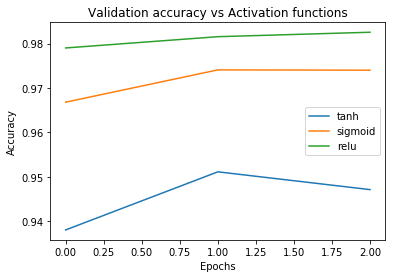

In [32]:
fig = plt.figure()
ax = plt.subplot(111)
for index,activation in enumerate(['tanh', 'sigmoid', 'relu']):
    ax.plot(list(range(3)),validation_acc[index], label=activation)
ax.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Validation accuracy vs Activation functions')
#plt.show()
plt.savefig('./plot1.png', format = 'png')

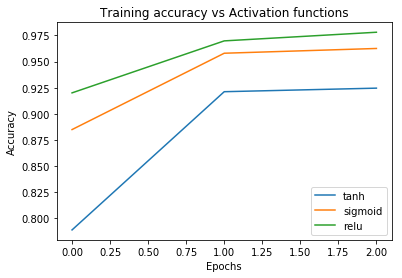

In [33]:
fig = plt.figure()
ax = plt.subplot(111)
for index,activation in enumerate(['tanh', 'sigmoid', 'relu']):
    ax.plot(list(range(3)),training_acc[index], label=activation)
ax.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training accuracy vs Activation functions')
#plt.show()
plt.savefig('./plot2.png', format = 'png')

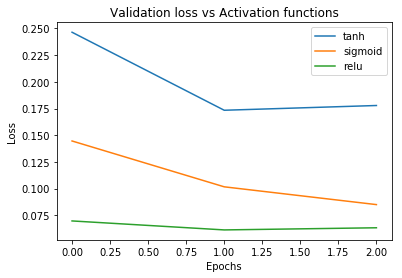

In [34]:
fig = plt.figure()
ax = plt.subplot(111)
for index,activation in enumerate(['tanh', 'sigmoid', 'relu']):
    ax.plot(list(range(3)),validation_loss[index], label=activation)
ax.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Validation loss vs Activation functions')
#plt.show()
plt.savefig('./plot3.png', format = 'png')

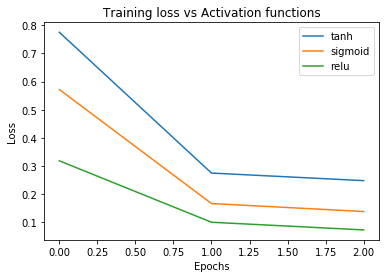

In [35]:
fig = plt.figure()
ax = plt.subplot(111)
for index,activation in enumerate(['tanh', 'sigmoid', 'relu']):
    ax.plot(list(range(3)),training_loss[index], label=activation)
ax.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss vs Activation functions')
#plt.show()
plt.savefig('./plot4.png', format = 'png')